In [1]:
# %load /Users/hwayment/ipynb_defaults.py
%load_ext autoreload
%autoreload 2

%pylab inline
import numpy as np
import pandas as pd
import os
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

import eternabench as eb

Populating the interactive namespace from numpy and matplotlib


In this notebook:

Figure 3B -- Ranking based on ArchiveII Test set

Figure S15 -- Ranking based on STRAND test set

Figure 3C -- Ranking based on EternaBench-CM Test set

also: Sequence data at 60% sequence similarity cutoff

Figure 3D -- Ranking based on EternaBench-Riboswitch Test set

# Secondary structure data -- ArchiveII_NR set

Sens
(4.699999999999999, 1.6999999999999997) [2.6999999999999997, 2]
PPV
(4.699999999999999, 1.6999999999999997) [2.6999999999999997, 2]
F-score
(4.699999999999999, 1.6999999999999997) [2.6999999999999997, 2]


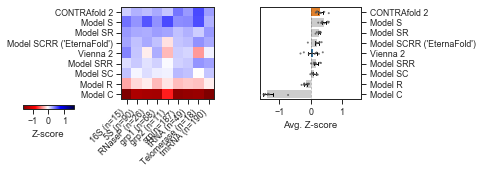

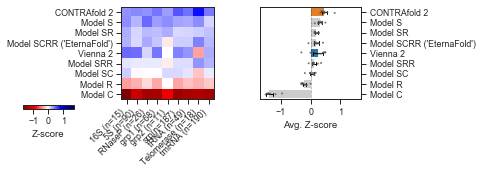

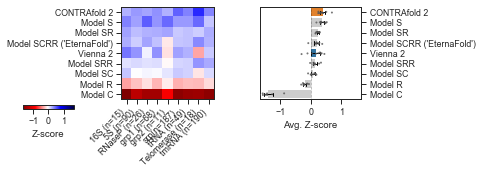

In [38]:
df = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/ArchiveII_NR_output_25Jan2022.csv')

pkgs = [x.split(' ')[0] for x in df.keys() if x.endswith('F-score')]

id_vars = ['Category','Name']
reshaped_df = pd.DataFrame()

for i, metric in enumerate(['Sens', 'PPV', 'F-score']):
    keys = list([x for x in df.keys() if x.endswith(metric)])
    tmp = df[id_vars+keys]
    tmp2 = tmp.melt(id_vars=id_vars)
    tmp2['package'] = [x.split(' ')[0] for x in tmp2['variable']]
    tmp2[metric] = tmp2['value']
    tmp2 = tmp2.drop(columns=['variable','value'])
    if i==0:
        reshaped_df = tmp2
    else:
        reshaped_df = pd.concat([reshaped_df,tmp2[[metric]]],axis=1)

reshaped_df['bs_ind'] = [x for x in range(len(df))]*9

dataset_labels=['16S (n=15)', '5S (n=90)', 'RNaseP (n=26)',
               'grp1 (n=68)','grp2 (n=11)', 'srp(n=187)', 'tRNA (n=49)','Telomerase (n=18)','tmRNA (n=190)']

pkg_order=['contrafold_2','eternafold_C','eternafold_D','eternafold_B','vienna_2',
           'eternafold_A','eternafold_E','eternafold_G','eternafold_F']

for i, metric in enumerate(['Sens', 'PPV', 'F-score']):
    print(metric)
    zscores, rank = eb.stats.calculate_Z_scores(reshaped_df, dataset_field='Category', metric=metric)
    
    eb.plot.ranked_heatmap(zscores, dataset_field='Category',metric=metric+'_zscore_by_Category_mean',
                           package_order=pkg_order, dataset_labels=dataset_labels,size=2)
    savefig('FIGURES/3/ArchiveII_NR_heatmap_%s.pdf' % metric,bbox_inches='tight')

zscores.to_csv('SUPP_TABLE_PRECURSORS/ArchiveII_NR_Fscore_by_dataset_20May2022.csv',index=False)

# Secondary structure data -- STRAND Test set

(3.8, 1.6999999999999997) [1.7999999999999998, 2]
(3.8, 1.6999999999999997) [1.7999999999999998, 2]
(3.8, 1.6999999999999997) [1.7999999999999998, 2]


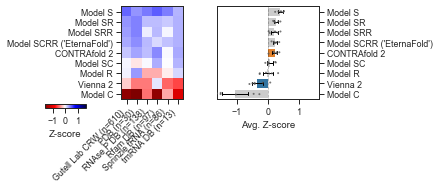

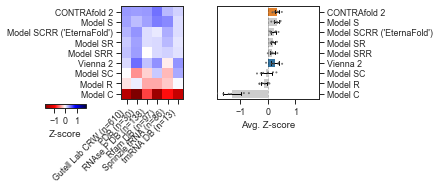

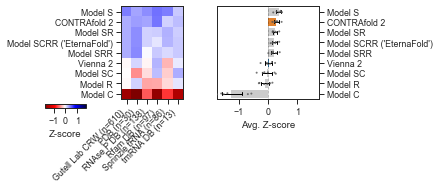

In [33]:
df = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/S-Processed-TES_metadata_plus_scores.csv')

pkgs = [x.split(' ')[0] for x in df.keys() if x.endswith('F-score')]

id_vars = ['SSTRAND_ID', 'TYPE', 'EXT_SOURCE', 'EXT_ID', 'ORGANISM']
reshaped_df = pd.DataFrame()

for i, metric in enumerate(['Sens', 'PPV', 'F-score']):
    keys = list([x for x in df.keys() if x.endswith(metric)])
    tmp = df[id_vars+keys]
    tmp2 = tmp.melt(id_vars=id_vars)
    tmp2['package'] = [x.split(' ')[0] for x in tmp2['variable']]
    tmp2[metric] = tmp2['value']
    tmp2 = tmp2.drop(columns=['variable','value'])
    if i==0:
        reshaped_df = tmp2
    else:
        reshaped_df = pd.concat([reshaped_df,tmp2[[metric]]],axis=1)

reshaped_df['bs_ind'] = [x for x in range(974)]*9

dataset_labels=['Gutell Lab CRW (n=610)', 'PDB (n=30)', 'RNAse P DB (n=138)', 'Rfam DB (n=97)', 'Sprinzle tRNA (n=86)', 'tmRNA DB (n=13)']

for i, metric in enumerate(['Sens', 'PPV', 'F-score']):
    zscores, _ = eb.stats.calculate_Z_scores(reshaped_df,dataset_field='EXT_SOURCE', metric=metric)
    
    eb.plot.ranked_heatmap(zscores, dataset_field='EXT_SOURCE',metric=metric+'_zscore_by_EXT_SOURCE_mean',dataset_labels=dataset_labels,size=2)
    savefig('FIGURES/SI/STRAND_TES_heamap_%s_20May2022.pdf' % metric,bbox_inches='tight')

zscores.to_csv('../scoring_data/STRAND_Fscore_by_dataset.csv',index=False)

# Chemical Mapping data

(7.3999999999999995, 3.2) [5.3999999999999995, 2]


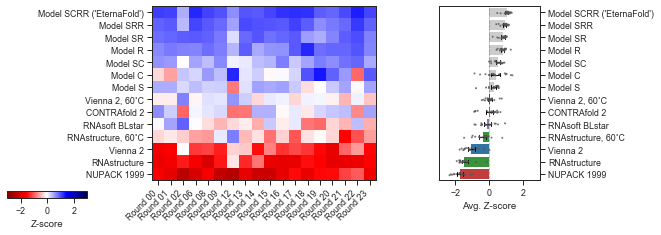

In [41]:
zscores = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/EB_efold_test_set_80_pearson_zscores_by_Dataset.csv')
eb.plot.ranked_heatmap(zscores, vmin=-3,vmax=3,size=2)

savefig('FIGURES/3/Figure_3_cm_80cutoff.pdf',bbox_inches='tight')

(7.1, 3.2) [5.1, 2]


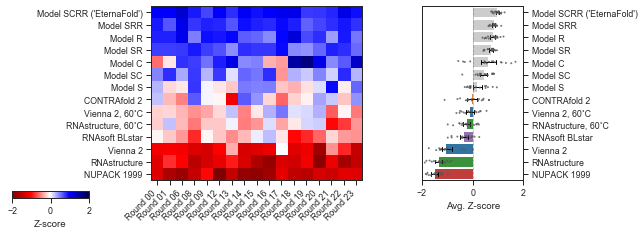

In [36]:
zscores = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/EB_efold_test_set_60_pearson_zscores_by_Dataset.csv')
eb.plot.ranked_heatmap(zscores, vmin=-2,vmax=2,size=2)

savefig('FIGURES/3/Figure_3_cm_60cutoff.pdf',bbox_inches='tight')

# Riboswitch data

(4.699999999999999, 3.2) [2.6999999999999997, 2]


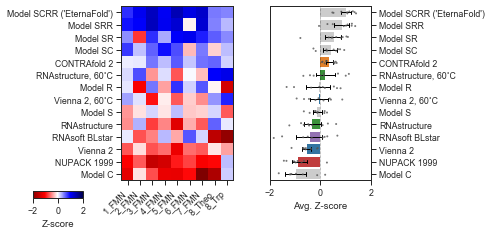

In [3]:
#zscores = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/RS_bps_pearson_zscores_Fig3_efold_testset.csv')
zscores = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/RS_bps_pearson_zscores_Fig3_efold_testset_23May2022.csv')

eb.plot.ranked_heatmap(zscores, vmin=-2, vmax=2,size=2)
savefig('FIGURES/3/Figure_3D_20May2022.pdf',bbox_inches='tight')